## 라이브러리 로드

In [62]:
# 필요 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로드
* [KLUE Benchmark](https://klue-benchmark.com/)

In [63]:
# read_json 으로 url 데이터 불러오기
url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"
# df
df = pd.read_json(url)
df.shape

(45678, 7)

In [64]:
# head
df.head()

,guid,title,predefined_news_category,label,annotations,url,date
0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,IT과학,생활문화,"{'annotators': ['08', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36
1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화,생활문화,"{'annotators': ['14', '13', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25
2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,IT과학,사회,"{'annotators': ['14', '13', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00
3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,IT과학,사회,"{'annotators': ['16', '11', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54
4,ynat-v1_train_00004,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화,생활문화,"{'annotators': ['03', '02', '12'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.04.03. 오전 7:05


In [65]:
# duplicated 로 중복데이터가 있는지 확인합니다.
df[df.duplicated(subset=["title"])]

,guid,title,predefined_news_category,label,annotations,url,date


In [66]:
# 결측치를 확인합니다.
df.isnull().sum()

guid                        0
title                       0
predefined_news_category    0
label                       0
annotations                 0
url                         0
date                        0
dtype: int64

## 텍스트 길이 분석

In [67]:
# 단어 길이 
df["title_len"] = df["title"].str.len()

In [68]:
# 토큰 개수
df["title_token_count"] = df["title"].str.split().str.len()


In [69]:
df[["title_len","title_token_count"]].describe()

,title_len,title_token_count
count,45678.000000,45678.000000
mean,27.366544,6.611213
std,4.864236,1.460011
min,4.000000,1.000000
25%,25.000000,6.000000
50%,28.000000,7.000000
75%,31.000000,8.000000
max,44.000000,13.000000


In [70]:
df[df["title_len"]==4]["title"]

4343    봄 산책
Name: title, dtype: object

array([[<Axes: title={'center': 'title_len'}>,
        <Axes: title={'center': 'title_token_count'}>]], dtype=object)

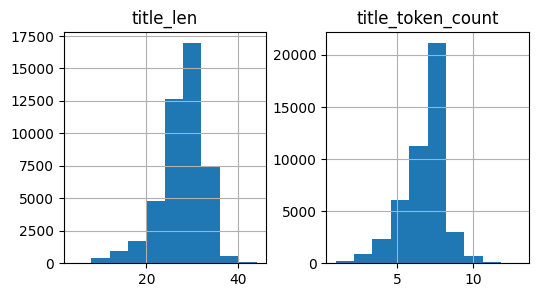

In [71]:
df.hist(figsize=(6,3),bins=10)

In [72]:
df[df["title_len"]==df["title_len"].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9


## 워드클라우드 시각화

In [73]:
# 텍스트 하나로 만들기
# news_title
news_title = " ".join(df["title"])
news_title[:1000]

'유튜브 내달 2일까지 크리에이터 지원 공간 운영 어버이날 맑다가 흐려져…남부지방 옅은 황사 내년부터 국가RD 평가 때 논문건수는 반영 않는다 김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것 회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간 야외서 생방송 하세요…액션캠 전용 요금제 잇따라 월드컵 태극전사 16강 전초기지 레오강 입성종합 미세먼지 속 출근길 왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보 베트남 경제 고성장 지속…2분기 GDP 6.71% 성장 그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원 정진석 이정현 당현실 냉정하게 봐야…물러나는게 좋다종합 美 베네수엘라 구호품 반입 촉구 안보리 결의 추진 황재균 쐐기타…kt 갈 길 바쁜 삼성에 고춧가루 정상회담 D1 文대통령 취임 후 남북관계 주요 일지 LGU＋ 1분기 영업익 1천706억원…마케팅 비용 감소종합 박원순 시장 아부다비 루브르 박물관 방문 방심위 강릉서 고성 산불현장처럼 보도한 KBS 관계자 징계 파키스탄 경제난 속 카타르서 30억 달러 투자 유치 일본 예산팽창에 재정건전성 우려…내년에 장기채무 GDP 2배 칠레 민중가수 살해하고 미국 도피 전 군인 법정에 선다 日 온라인으로 중국인 비자신청 받는다 미 동부 마비시킨 악성 파일 국내서도 발견 국내 발간 나노분야 학술지 나노 컨버전스 SCIE 등재 5G 상용화 행정절차 완료…이통3사 내일 동시 전파 발사 예스24 독자들이 선정한 올해의 책 여행의 이유 이해찬 정경두에 안보지원사 기무사 같은 일 없도록 해야 미래부 17개 부처별 연구비관리시스템 2개로 통합한다 손흥민 더 승부욕 갖고 거칠게 해야…나부터 반성 SK텔레콤안양시 모빌리티·스마트시티 조성 업무협약 울산 오후 4시 건조주의보 기업들 日규제 직접 피해보다 수입 불확실성이 더 문제 日경제산업상 경제보복 비판여론에 언론이 제대로 이해못해 다시 포효한 황의조 3년 만의 A매치 골 집중력 유지한... 최근 5년간 공무원시험 응시 127만명…경제비용 수조원 트럼프 의

In [74]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'

# !apt -qq -y install fonts-nanum

import platform

# 운영체제에 따른 한글 폰트 경로 설정
if platform.system() == 'Windows':
    # Windows 운영체제의 경우
    font_path = r'C:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
    # macOS의 경우
    font_path = r'/Library/Fonts/AppleGothic.ttf'
else:
    # Linux 또는 기타 운영체제의 경우 (예: 'NanumBarunGothic')
    font_path = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

### 불용어 처리 시 의미가 왜곡되지 않도록 주의가 필요

In [75]:
!uv add wordcloud

Resolved 122 packages in 1ms
Audited 118 packages in 0.18ms


In [76]:
from wordcloud import WordCloud

stopwords = ['하지만', '그리고', '그런데', '저는','제가',
             '그럼', '이런', '저런', '합니다',
             '많은', '많이', '정말', '너무', '수', '등', '것']

def display_word_cloud(data, width=1200, height=500):
    word_cloud = WordCloud(font_path=font_path,
                           width=width,
                           height=height,
                           stopwords=stopwords,
                           background_color="white",
                           random_state=42
                           ).generate(data)
    
    plt.figure()
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()


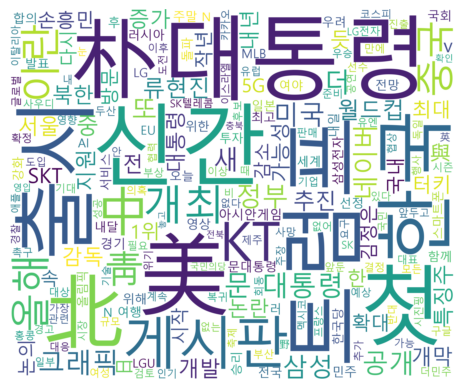

In [77]:
display_word_cloud(news_title,2400,2000)

In [78]:
df["label"].nunique()

7

In [79]:
df["label"].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [80]:
a = df[df["label"]=="스포츠"]["title"]
sports_title = " ".join(a)
sports_title[:100]

'월드컵 태극전사 16강 전초기지 레오강 입성종합 황재균 쐐기타…kt 갈 길 바쁜 삼성에 고춧가루 손흥민 더 승부욕 갖고 거칠게 해야…나부터 반성 다시 포효한 황의조 3년 만의 A매'

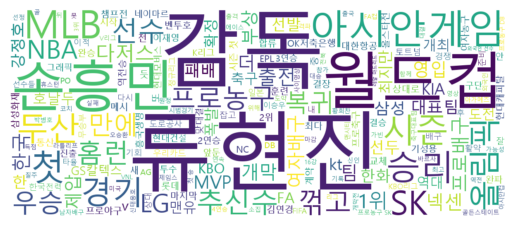

In [81]:
display_word_cloud(sports_title)

## 정규표현식으로 전처리

In [82]:
# 숫자 제거하기 [0-9], \d
# 문자만 남기기 [^ㄱ-ㅎㅏ-ㅣ가-힣 a-zA-Z]
# df["title"]
df['title2'] = df['title'].str.replace("[0-9]","",regex=True)
df["title3"] = df["title"].str.replace("[^가-힣 a-zA-Z]", "", regex=True)

## 정규표현식 전처리 후 워드클라우드 시각화

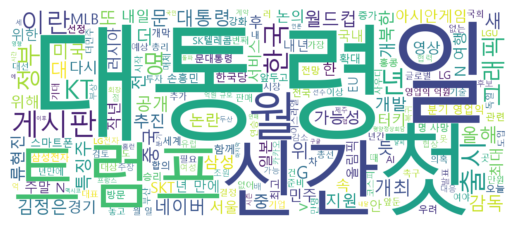

In [83]:
display_word_cloud(" ".join(df['title3']))


## 형태소 분석기로 특정 품사만 추출하기

* [hyunwoongko/pecab: Pecab: Pure python Korean morpheme analyzer based on Mecab](https://github.com/hyunwoongko/pecab)

In [84]:
# !pip install pecab
!uv add pecab


Resolved 122 packages in 1ms
Audited 118 packages in 0.07ms


In [85]:
df.loc[df['title_len']==df['title_len'].max()]

,guid,title,predefined_news_category,label,annotations,url,date,title_len,title_token_count,title2,title3
5792,ynat-v1_train_05792,美기준금리 0.25%p 인상→0.50%∼0.75%…내년 3차례 인상 시사종합2보,세계,세계,"{'annotators': ['02', '18', '03'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.15. 오전 5:10,44,6,美기준금리 .%p 인상→.%∼.%…내년 차례 인상 시사종합보,기준금리 p 인상내년 차례 인상 시사종합보
20168,ynat-v1_train_20168,그래픽 네이처 세계 연구기관 2017년 평가 발표…서울대 국내 1위·세계 70위,IT과학,사회,"{'annotators': ['12', '07', '14'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.09.14. 오후 2:43,44,10,그래픽 네이처 세계 연구기관 년 평가 발표…서울대 국내 위·세계 위,그래픽 네이처 세계 연구기관 년 평가 발표서울대 국내 위세계 위
28257,ynat-v1_train_28257,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 1∼3코스 89.2㎞ 절경 즐비,생활문화,생활문화,"{'annotators': ['14', '07', '15'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2016.12.09. 오전 11:00,44,11,주말 N 여행 영남권 겨울바다 낭만…부산 갈맷길 ∼코스 .㎞ 절경 즐비,주말 N 여행 영남권 겨울바다 낭만부산 갈맷길 코스 절경 즐비
30493,ynat-v1_train_30493,MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매,IT과학,IT과학,"{'annotators': ['13', '10', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.26. 오전 11:00,44,9,MWC 갤S GB 출고가 만천원…자급제 포함 일 예약판매,MWC 갤S GB 출고가 만천원자급제 포함 일 예약판매


In [86]:
df.loc[20168, "title"].split()

['그래픽', '네이처', '세계', '연구기관', '2017년', '평가', '발표…서울대', '국내', '1위·세계', '70위']

In [90]:
# 명사추출하기
# df['title_nouns']
from pecab import PeCab
pecab = PeCab()
pecab.nouns(df.loc[20168, "title"])

['그래픽', '네이처', '세계', '연구', '기관', '년', '평가', '발표', '서울대', '국내', '위', '세계', '위']

In [88]:
# display_word_cloud(" ".join(df['title_nouns']))

In [95]:
df_society = df.loc[df["label"]=="사회"].sample(1000,random_state=42).copy()
df_society.shape

(1000, 11)

In [98]:
df_society["title_nouns"] = df_society["title"].map(lambda x : " ".join(pecab.nouns(x)))
df_society["title_nouns"]

45317          국가 재원 나라 배움터 러닝 올해 학습 서비스 시작
17300    장석 점거 몸싸움 욕설 동물 국회 재연 아수라장 국회 종합 보
20660                       양제츠 자리 안내 정의 실장
6542              건강 기능 식품 광고 사전 심의 사전 검열 위
11095                  거래소 안랩 성실 공시 법인 미 지정
                        ...                
14563              직장 핵심 기술 경동나비엔 연구원 심도 실형
22511                중국 언론 김동연 부총리 강연 조명 환호
22422                             부스 황창규 회장
8233          당국 핀테크 위크 참여 레그 테크 섭 테크 기업 모집
27685                      리콜 집단 소송 참가자 천 명
Name: title_nouns, Length: 1000, dtype: object

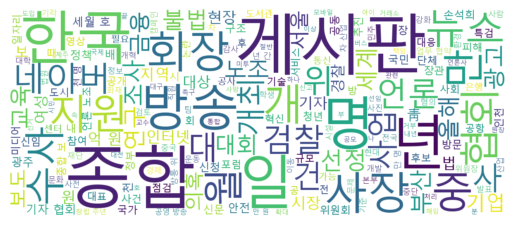

In [99]:
display_word_cloud(" ".join(df_society["title_nouns"]))

## 워드클라우드 마스크처리

* https://github.com/amueller/word_cloud/blob/main/examples/masked.py

### 마스크 이미지 다운로드

In [89]:
import requests
from PIL import Image

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
mask_img_path = "https://raw.githubusercontent.com/amueller/word_cloud/main/examples/alice_mask.png"

# 이미지 데이터를 받아옵니다
response = requests.get(mask_img_path)

# HTTP 요청이 성공했는지 확인합니다
if response.status_code == 200:
    # 응답으로 받은 데이터를 파일로 저장합니다
    with open("alice_mask.png", "wb") as file:
        file.write(response.content)

mask_img = np.array(Image.open("alice_mask.png"))

### 마스크 적용